In [1]:
#import the SMO class from smo_class.ipynb
%run smo_class.ipynb

In [2]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_moons

In [4]:
n_samples = 300
x, y = make_moons(n_samples=n_samples, noise=.1)

In [5]:
X_pos = x[[i for i in range(len(y)) if y[i] == 1]]
X_neg = x[[i for i in range(len(y)) if y[i] == 0]]
X = np.concatenate((X_pos, X_neg))

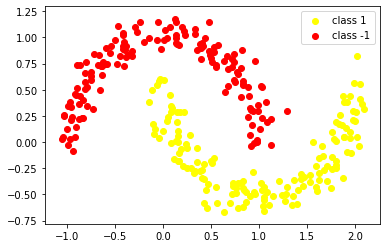

In [6]:
plt.scatter(X_pos[:,0], X_pos[:,1], color = 'yellow')
plt.scatter(X_neg[:,0], X_neg[:,1], color = 'red')
plt.legend(('class 1', 'class -1'))

In [7]:
y_pos = np.ones(X_pos.shape[0])
y_neg = -np.ones(X_neg.shape[0])
y = np.concatenate((y_pos,y_neg))

In [8]:
# hyperparameter tuning with Grid search 
accuracy = 0
for steps in [500, 2000, 5000] :
    for C in [1, 5, 10] : # we choose to iterate over "large" values of C because we don't want to allow any misclassifications.
                          # we see that the dataset is separable by the choice of a proper kernel
        for sigma in [0.1, 1, 2, 10]:
            objct = SMO(X,y,steps,C,1,sigma)
            a, b = objct.Smo()
            acc = accuracy_score(y,np.sign(objct.Bndry(X,a,b)))
            if acc > accuracy :
                opt_steps = steps
                opt_C = C
                opt_sigma = sigma
                accuracy = acc

In [9]:
print('The optimal kernelized margin classifier is the one with : steps=',opt_steps, ', C=',opt_C, ' and sigma =', opt_sigma)

The optimal kernelized margin classifier is the one with : steps= 500 , C= 1  and sigma = 0.1


In [10]:
clf = SMO(X,y,opt_steps, opt_C, 1, opt_sigma)

In [11]:
#get the support vectors and the parameter b
a,b = clf.Smo()

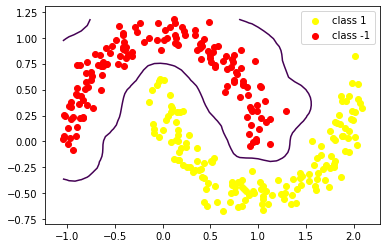

In [12]:
#draw the best performing classifier over the dataset
r = 50
x_min = X[:,0].min()
y_min = X[:,1].min()
x_max = X[:,0].max()
y_max = X[:,1].max()

u = np.linspace(x_min,x_max, r)
v = np.linspace(y_min,y_max, r)

xx, yy = np.meshgrid(u,v)
xx_line = np.resize(xx,(r**2,1))
yy_line = np.resize(yy,(r**2,1)) 
t = np.concatenate((xx_line,yy_line), axis = 1)

z_pre = clf.Bndry(t, a, b)
z_post = np.resize(z_pre,(r,r))  
plt.contour(xx,yy,z_post, levels = [0])
plt.scatter(X_pos[:,0], X_pos[:,1], color = 'yellow')
plt.scatter(X_neg[:,0], X_neg[:,1], color = 'red')
plt.legend(('class 1', 'class -1'))

In [13]:
print('accuracy over the training set : ', accuracy_score(y,np.sign(clf.Bndry(X,a,b))))

accuracy over the training set :  1.0
